# SimpleRNN 레이어
- 시퀀스 데이터를 처리하기 위해 개발된 가장 기본적인 형태의 순환 신경망
- Simple RNN은 자연어 처리(Natural Language Processing, NLP), 시계열 예측(Time Series Forecasting), 음성 인식(Speech Recognition)과 같이 입력 데이터가 시간적 순서를 가지고 있는 문제를 해결하는 데 사용
- RNN의 핵심 아이디어는 과거의 정보를 현재의 결정에 활용
- 시퀀스가 길어질수록 시간적으로 멀리 떨어진 정보를 현재 의사 결정에 효과적으로 반영하는 데 어려움

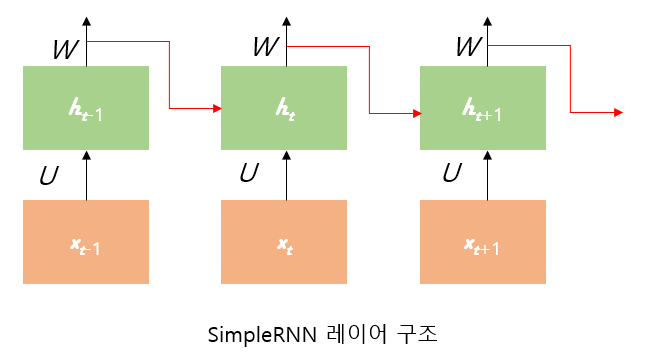

- x는 입력을 나타내고, h는 레이어의 출력을 나타낸다. U와 W는 입력과 출력에 곱해지는 가중치다.
- 단계 t 에서의 SimpleRNN 레이어의 출력이다.
- 활성화 함수로는 tanh 가 쓰인다. (활성화 함수 자리에 ReLU 같은 다른 활성화 함수를 쓸수도 있다.)

## 옵션
- units : 뉴런 수
- activation : 활성화 함수
- return-sequences : 시퀀스 전체 출력 여부
```
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)
```

In [3]:
import numpy as np 

X = []
y = []

for i in range(6):
    lst = list(range(i, (i+4)))
    X.append(list(map(lambda x: [x/10], lst)))
    y.append((i+4)/10)

X = np.array(X)
y = np.array(y)

print(X[0], y[0])
print(X[1], y[1])
print(X[2], y[2])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6


In [4]:
import tensorflow as tf
from keras import Input, layers, models

model = models.Sequential()
model.add(Input(shape=[4,1]))
model.add(layers.SimpleRNN(units=10, return_sequences=False))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X, y, epochs=100, verbose=0)
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.4149766 ]
 [0.532028  ]
 [0.6325499 ]
 [0.7158652 ]
 [0.7833444 ]
 [0.83717287]]


In [7]:
y

array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [9]:
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[[0.87959075]]


In [11]:
X[-1], y[-1]

(array([[0.5],
        [0.6],
        [0.7],
        [0.8]]),
 0.9)

In [12]:
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.2852778]]


In [13]:
X[0], y[0]

(array([[0. ],
        [0.1],
        [0.2],
        [0.3]]),
 0.4)

- 테스트 데이터에 대한 시퀀스를 정확히 예측하게 하는 것은 쉬운 문제가 아니다.
- 신경망에 일반화된 규칙을 학습시키는 것은 어려운 과제 중 하나이다.

## 애플 주식 예측
> pip install yfinance

참고. https://pypi.org/project/yfinance/#logging

1. 데이터 다운로드 및 준비:

  - yfinance 라이브러리를 사용하여 Apple(AAPL)의 주식 데이터를 다운로드합니다.
  - 종가(Close) 데이터를 사용하여 시계열 데이터셋을 만듭니다.
  - 데이터는 MinMaxScaler를 사용하여 0과 1 사이로 정규화합니다.

In [15]:
import yfinance as yf
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [17]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
print(data.keys())
data= data[['Close']] # Close 는 종가

data, data.shape

[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(                 Close
 Date                  
 2023-01-03  125.070000
 2023-01-04  126.360001
 2023-01-05  125.019997
 2023-01-06  129.619995
 2023-01-09  130.149994
 ...                ...
 2023-12-22  193.600006
 2023-12-26  193.050003
 2023-12-27  193.149994
 2023-12-28  193.580002
 2023-12-29  192.529999
 
 [250 rows x 1 columns],
 (250, 1))

In [18]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data)

In [19]:
scaler_data[:5]

array([[0.00068413],
       [0.01833361],
       [0.        ],
       [0.06293608],
       [0.0701874 ]])

2. 데이터셋 생성:
  - create_dataset 함수를 사용하여 시계열 데이터를 생성합니다. 각 입력 시퀀스의 길이는 time_step으로 지정합니다.
  - 데이터를 학습(train)과 테스트(test)로 분할합니다.

In [20]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 10
X, y = create_dataset(scaler_data, time_step)

In [24]:
X[0:2]

array([[0.00068413, 0.01833361, 0.        , 0.06293608, 0.0701874 ,
        0.07812285, 0.11588464, 0.11479007, 0.13326033, 0.14940491],
       [0.01833361, 0.        , 0.06293608, 0.0701874 , 0.07812285,
        0.11588464, 0.11479007, 0.13326033, 0.14940491, 0.13941729]])

In [25]:
y[0:2]

array([0.13941729, 0.14023816])

In [26]:
X.shape, y.shape

((239, 10), (239,))

In [27]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

In [29]:
# X_train, X_test = X[:train_size], X[train_size:]
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[:train_size], y[train_size:]

In [30]:
X_train.shape

(191, 10)

In [31]:
# 데이터 모양 변환 [samples, time_step, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
X_train.shape

(191, 10, 1)

3. 모델 구성 및 훈련:
  - SimpleRNN 레이어와 Dense 레이어를 사용하여 모델을 구성합니다.
  - 모델을 컴파일하고 훈련시킵니다. 훈련 과정의 손실을 시각화합니다.

In [34]:
model = models.Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(layers.SimpleRNN(50, return_sequences=False))
model.add(layers.Dense(1))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, 
                    batch_size=16, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - val_loss: 0.0037
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_

4. 예측 및 결과 시각화:
  - 학습된 모델을 사용하여 예측을 수행합니다.
  - 예측 결과를 원래 데이터 스케일로 역변환하여 실제 데이터와 비교합니다.
  - 결과를 시각화하여 모델의 성능을 평가합니다.

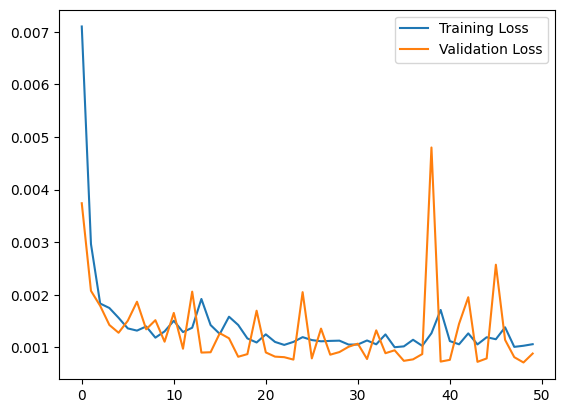

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [38]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [42]:
print(y_train[:5])
print(train_pred[:5])

[0.13941729 0.14023816 0.17581061 0.2201396  0.23956767]
[[0.16541797]
 [0.15157373]
 [0.15538836]
 [0.18397574]
 [0.2206821 ]]


In [43]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [44]:
print(y_train[:5])
print(train_pred[:5])

[0.13941729 0.14023816 0.17581061 0.2201396  0.23956767]
[[137.1104 ]
 [136.09851]
 [136.37733]
 [138.46678]
 [141.14964]]


In [47]:
look_back = time_step
trainPredictPlot = np.empty((len(scaler_data), 1))
trainPredictPlot[:, :] = np.nan

In [48]:
trainPredictPlot[look_back:len(train_pred) + look_back, :] = train_pred

In [49]:
testPredictPlot = np.empty((len(scaler_data), 1))
testPredictPlot[:, :] = np.nan
start_idx = len(train_pred)
end_idx = start_idx + len(test_pred)
testPredictPlot[start_idx:end_idx, :] = test_pred

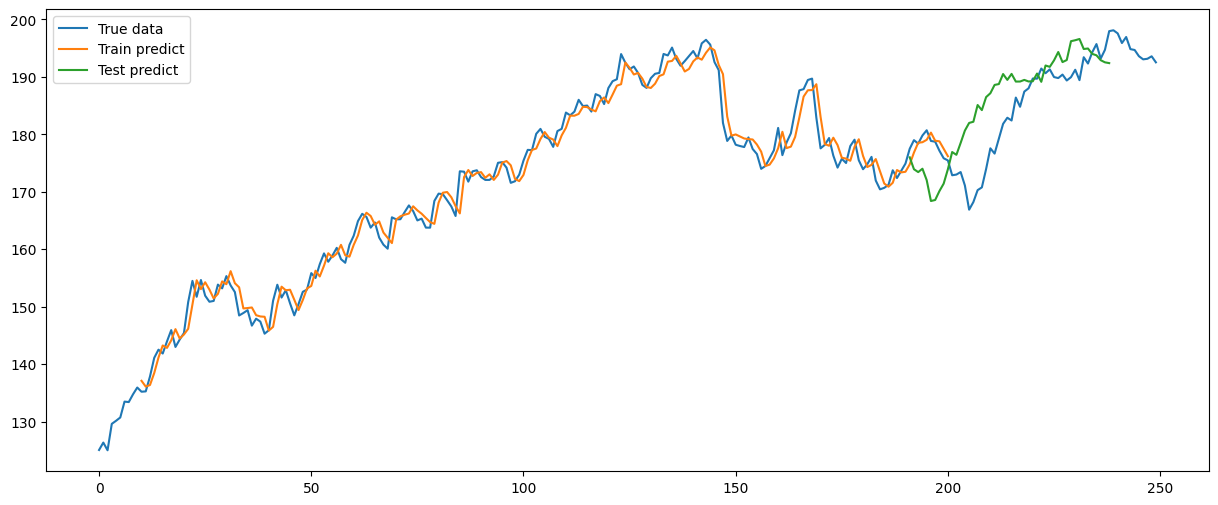

In [50]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(scaler_data), label='True data')
plt.plot(trainPredictPlot, label='Train predict')
plt.plot(testPredictPlot, label='Test predict')
plt.legend()
plt.show()

> 정리 코드

In [52]:
import yfinance as yf
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Input
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0546
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0596  
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 16/50
12/

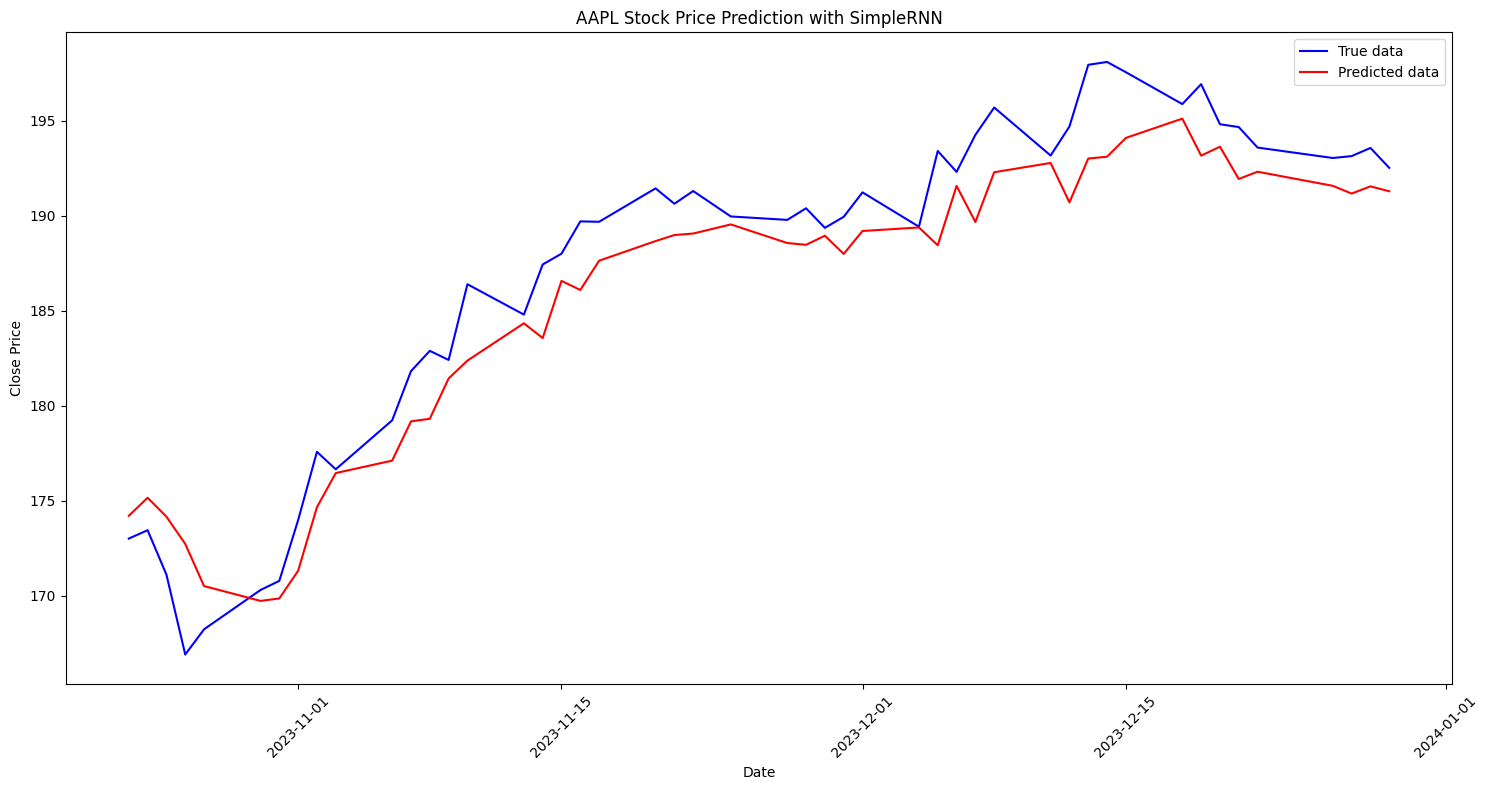

In [55]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
data = data[['Close']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i+time_steps), 0])
        ys.append(data[i+time_steps, 0])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X, y = create_sequences(scaled_data, TIME_STEPS)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(15,8))
plt.plot(data.index[-len(y_test_unscaled):], y_test_unscaled, label='True data', color="blue")
plt.plot(data.index[-len(y_test_unscaled):], y_pred_unscaled, label='Predicted data', color="red")
plt.title('AAPL Stock Price Prediction with SimpleRNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()